In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import processed data
df = pd.read_csv('E:\Projects\canadacharities\data\interim\charity_data.csv')

## Class distribution

What is the revoked/registered split?

In [3]:
df2 = df.reset_index().groupby('Status').size().to_frame('count')
df2['percentage'] = round(df2['count'] / len(df), 3)
print (df2)

            count  percentage
Status                       
Registered  72252       0.983
Revoked      1239       0.017


<b>Less than 2% of 73.5K charities who filed information with CRA in 2018 fiscal year had their charity status revoked between 2018-2020.</b>

## Plotting

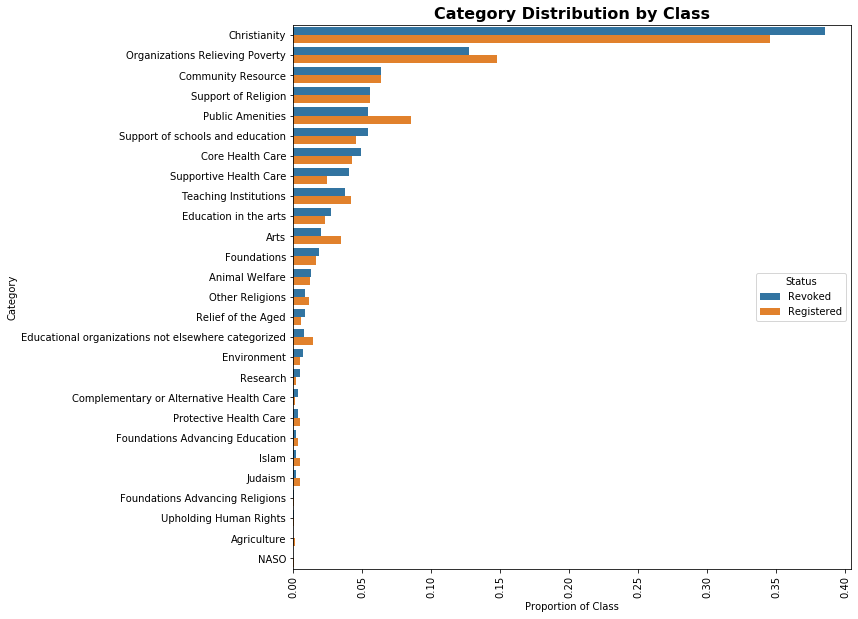

In [4]:
plt.figure(figsize=[10,10])
cat_df = df.groupby(['Status','Category'])['BN/Registration Number'].agg(['count'])
cat_df['category_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
cat_df = cat_df['category_perc'].reset_index().sort_values(['Status', 'category_perc'], ascending=False)

sns.barplot(x='category_perc', y='Category', hue='Status', data=cat_df)
plt.xticks(rotation=90)
plt.ylabel('Category')
plt.xlabel('Proportion of Class')
plt.title('Category Distribution by Class', fontsize = 16, fontweight='bold')
plt.show();

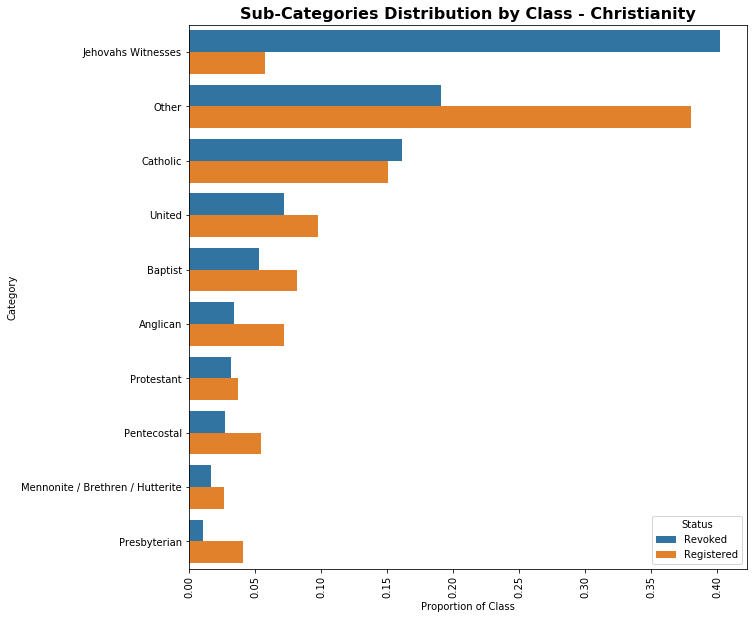

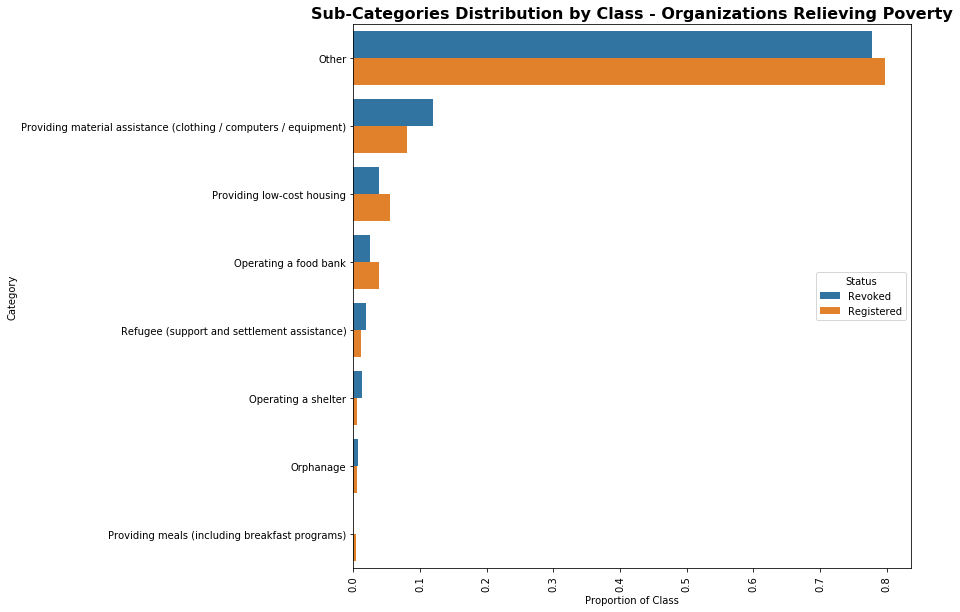

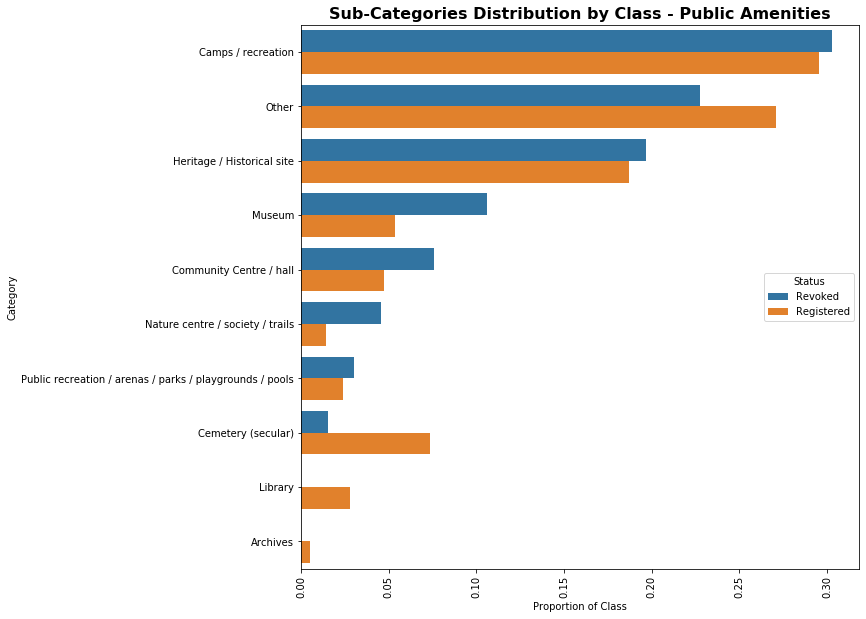

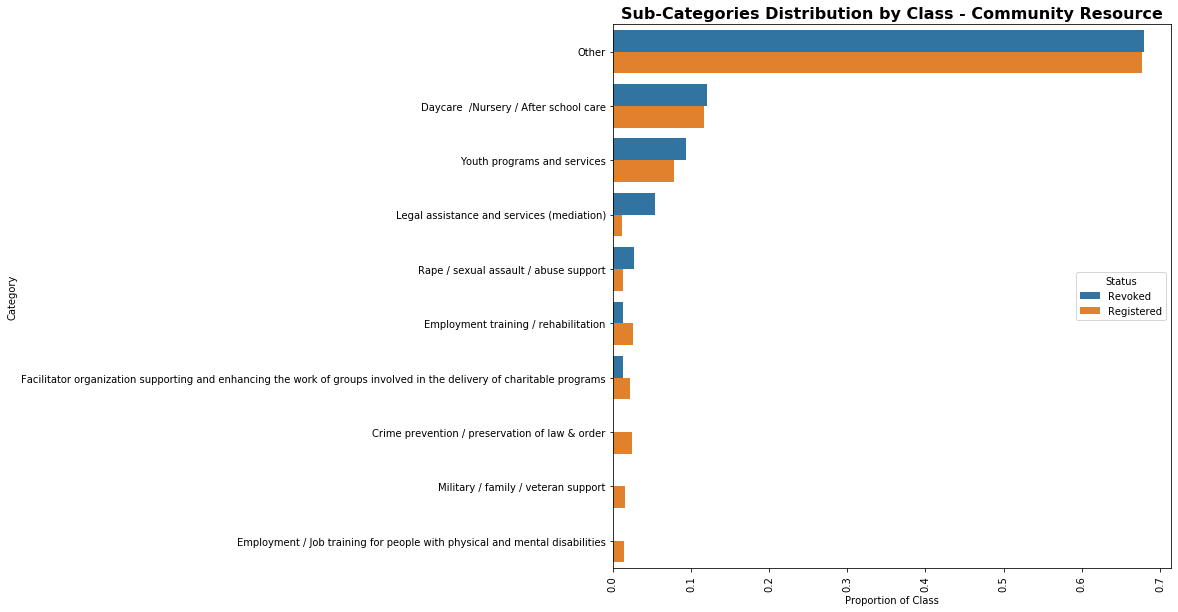

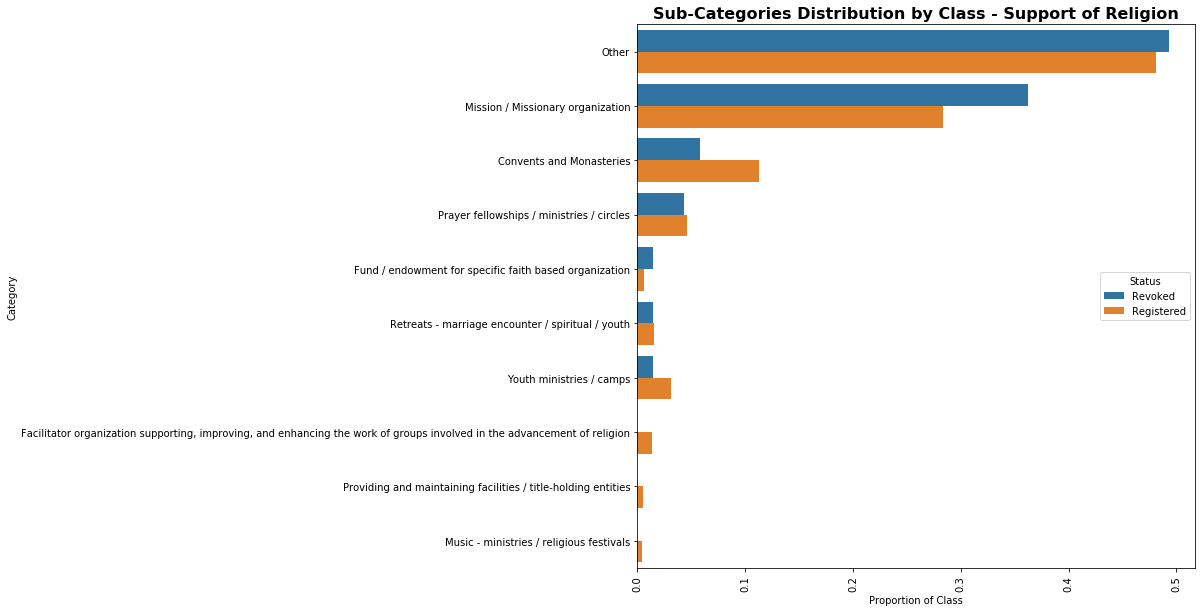

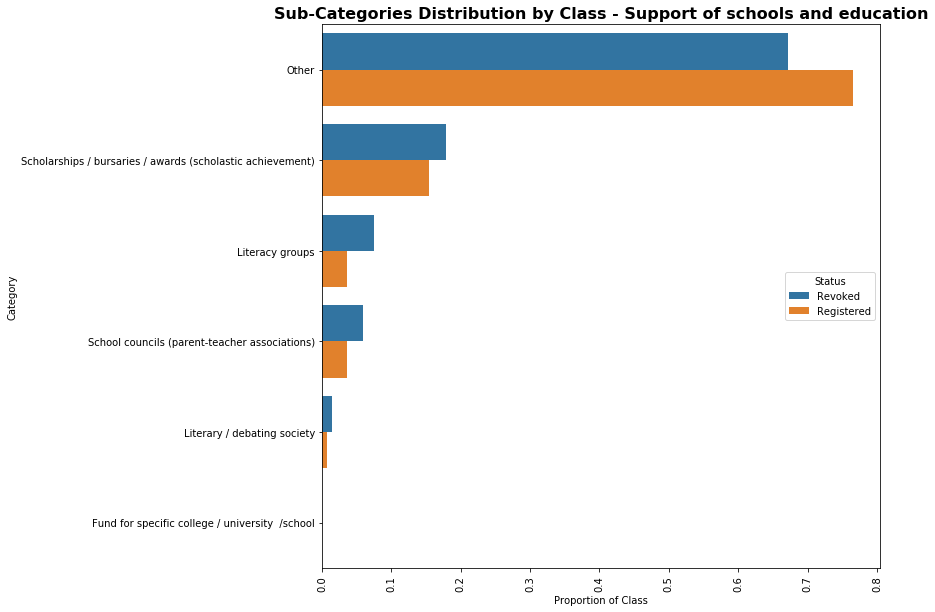

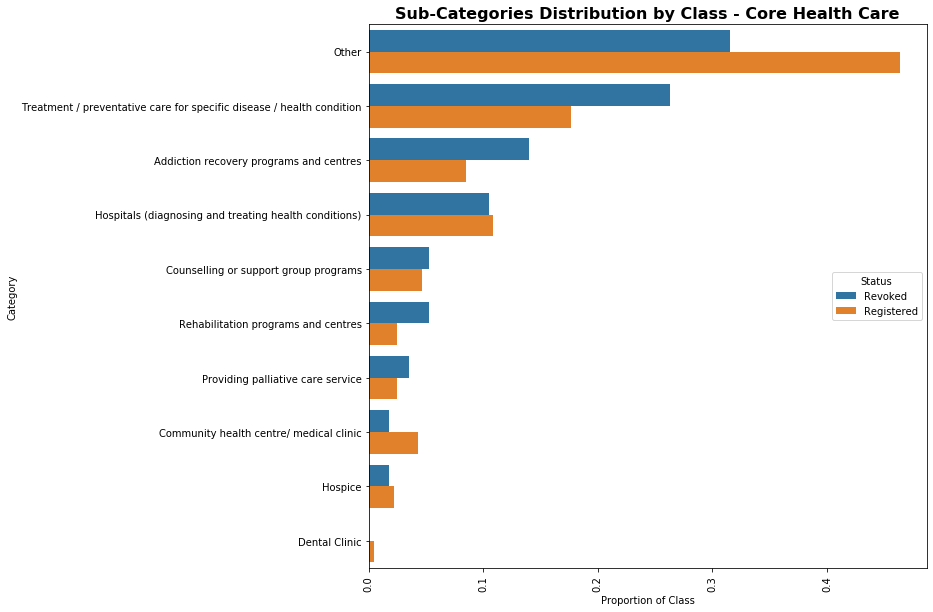

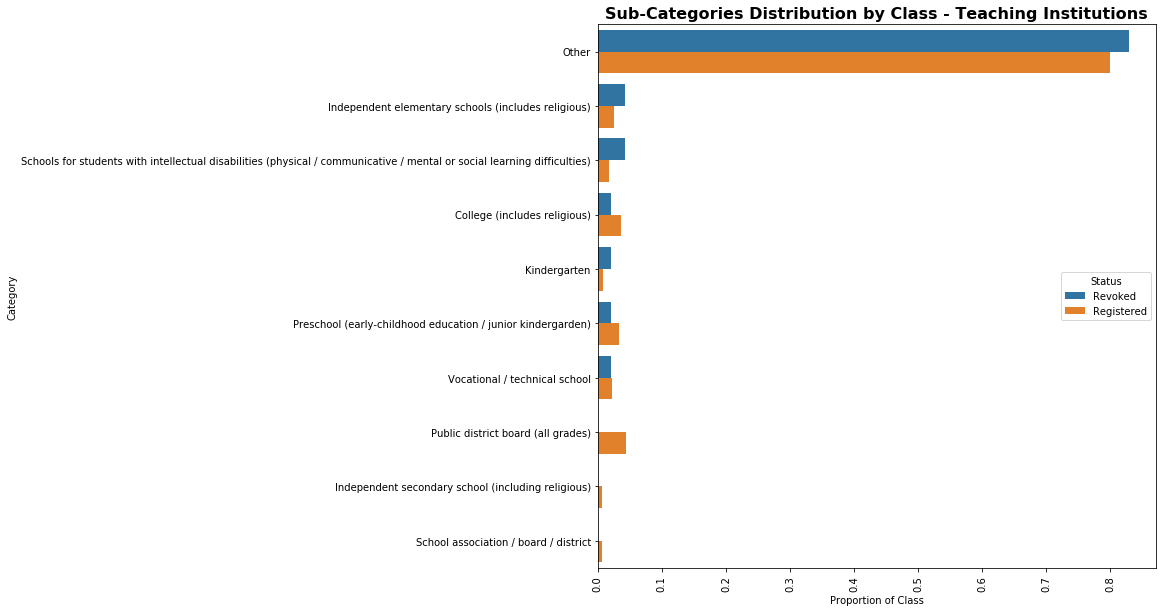

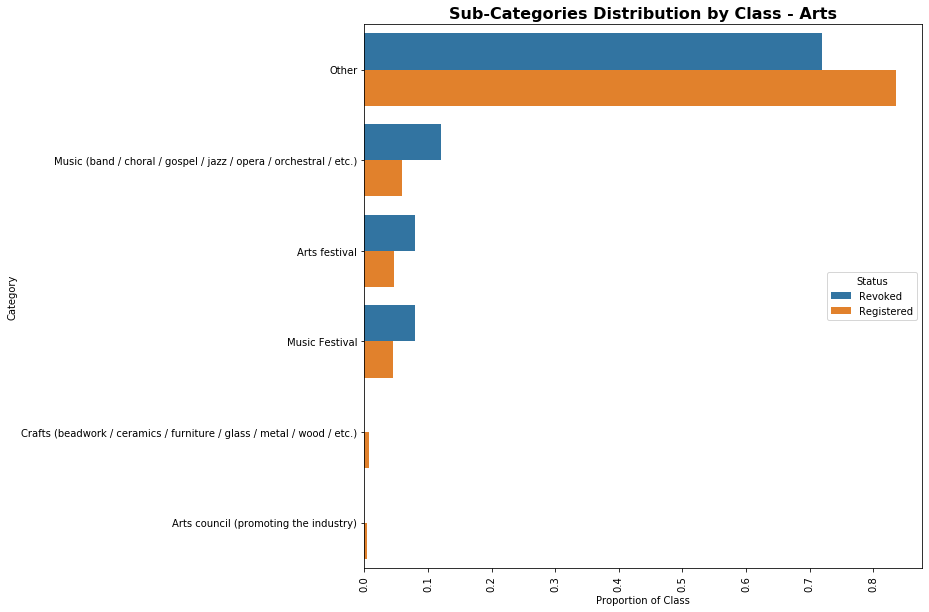

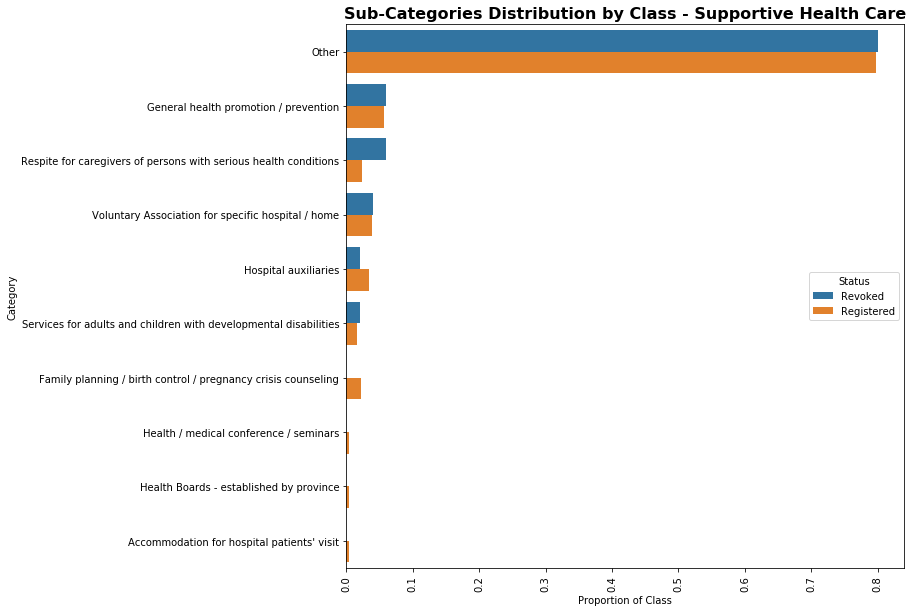

In [5]:
top_categories = df['Category'].value_counts(dropna=False)[:10].index.tolist()

for category in top_categories:
    cat_df = df.loc[df['Category']==category, :] #filter for category data
    top_subcategories = cat_df['Sub-Category'].value_counts(dropna=False)[:10].index.tolist()
    cat_df = cat_df.loc[cat_df['Sub-Category'].isin(top_subcategories), :]
    
    plt.figure(figsize=[10,10])
    cat_df = cat_df.groupby(['Status','Sub-Category'])['BN/Registration Number'].agg(['count'])
    cat_df['subcategory_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
    cat_df = cat_df['subcategory_perc'].reset_index().sort_values(['Status', 'subcategory_perc'], ascending=False)

    sns.barplot(x='subcategory_perc', y='Sub-Category', hue='Status', data=cat_df)
    plt.xticks(rotation=90)
    plt.ylabel('Category')
    plt.xlabel('Proportion of Class')
    plt.title('Sub-Categories Distribution by Class - {}'.format(category), fontsize = 16, fontweight='bold')
    plt.show();

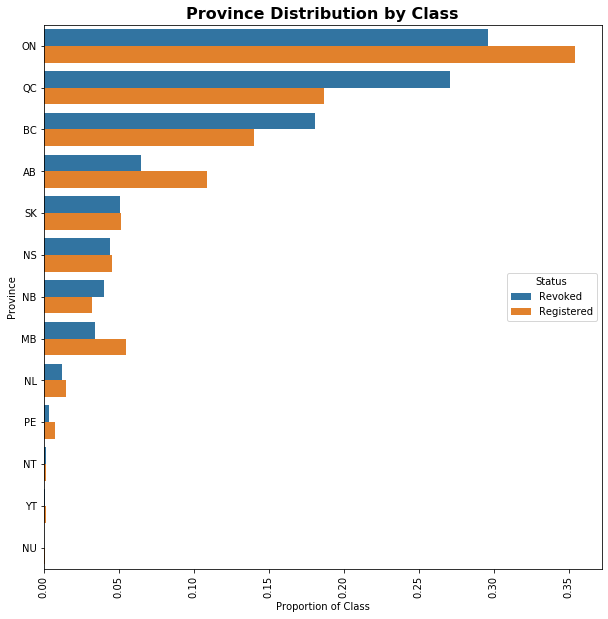

In [6]:
plt.figure(figsize=[10,10])
canada_provinces = ['ON', 'QC', 'BC', 'AB', 'SK', 'NS', 'NB', 'MB', 'NL', 'PE', 'NT', 'YT', 'NU']

#filter for Canada provinced
cat_df = df.loc[df['Province'].isin(canada_provinces), :]

cat_df = cat_df.groupby(['Status','Province'])['BN/Registration Number'].agg(['count'])
cat_df['category_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
cat_df = cat_df['category_perc'].reset_index().sort_values(['Status', 'category_perc'], ascending=False)

sns.barplot(x='category_perc', y='Province', hue='Status', data=cat_df)
plt.xticks(rotation=90)
plt.ylabel('Province')
plt.xlabel('Proportion of Class')
plt.title('Province Distribution by Class', fontsize = 16, fontweight='bold')
plt.show();

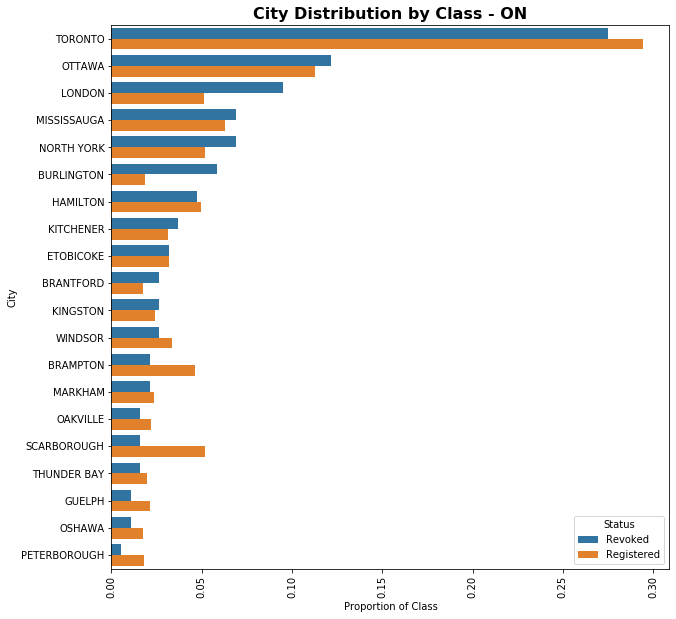

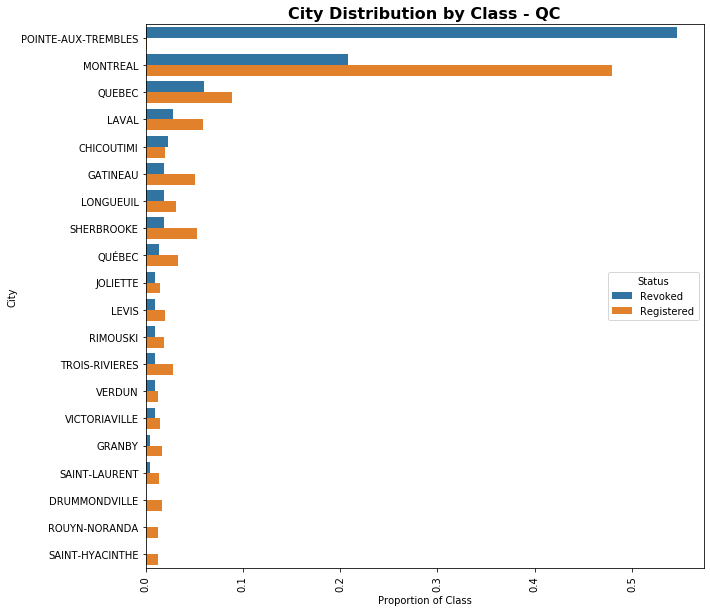

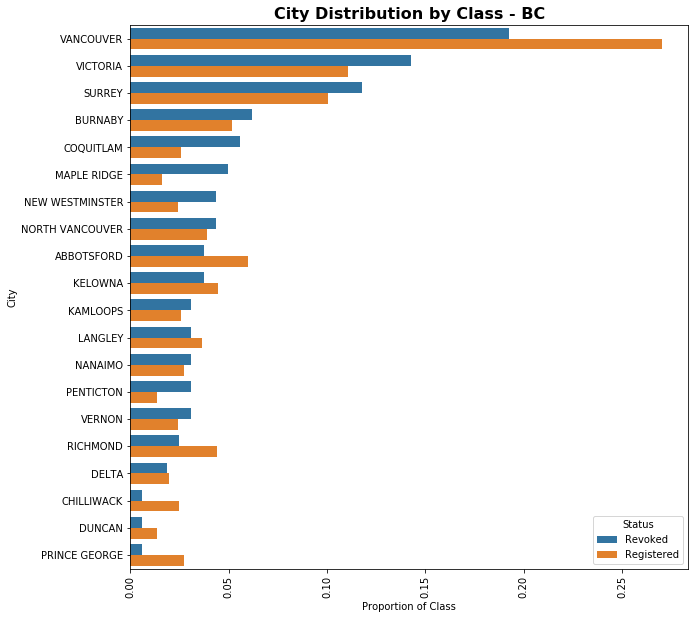

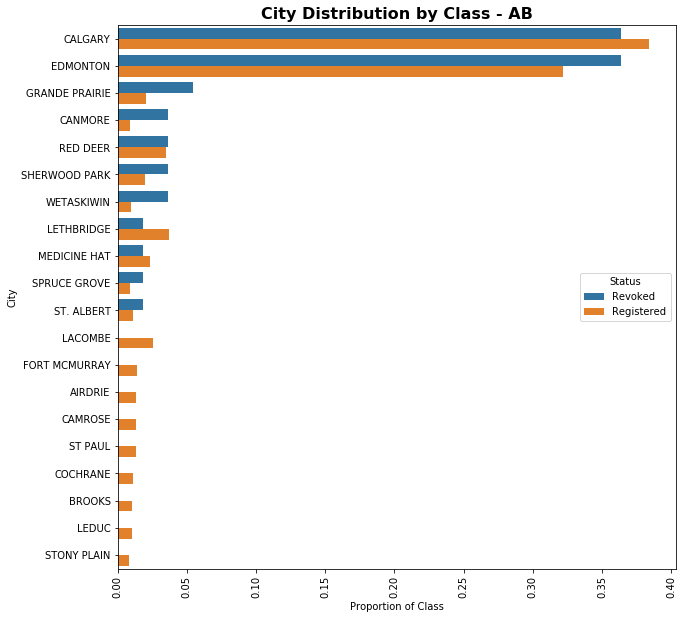

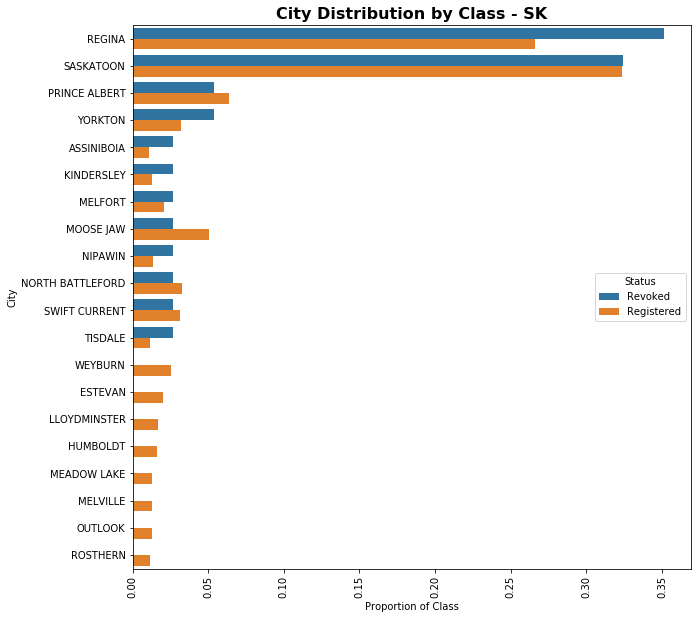

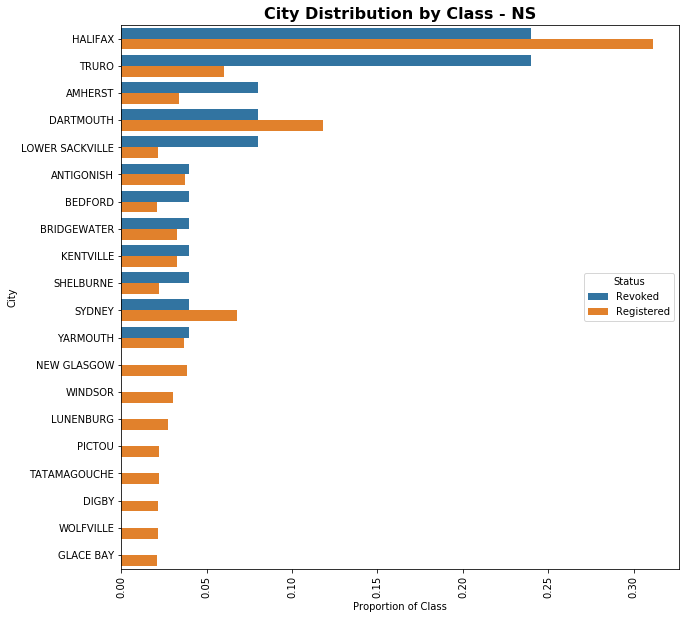

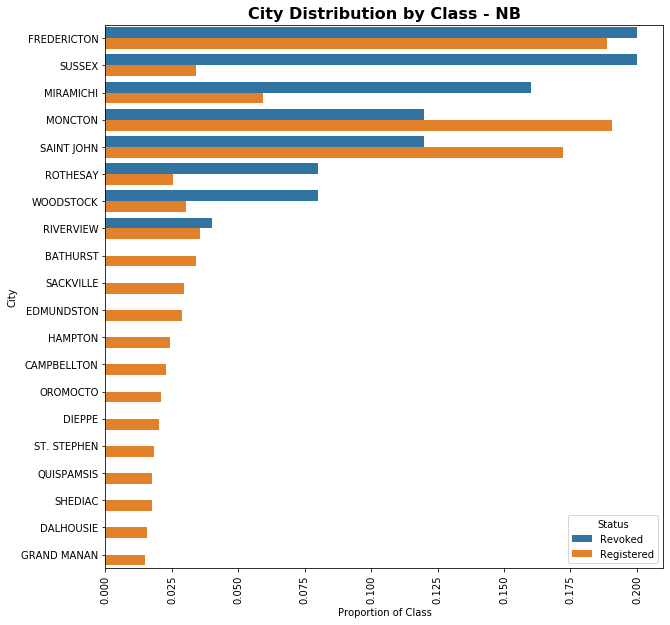

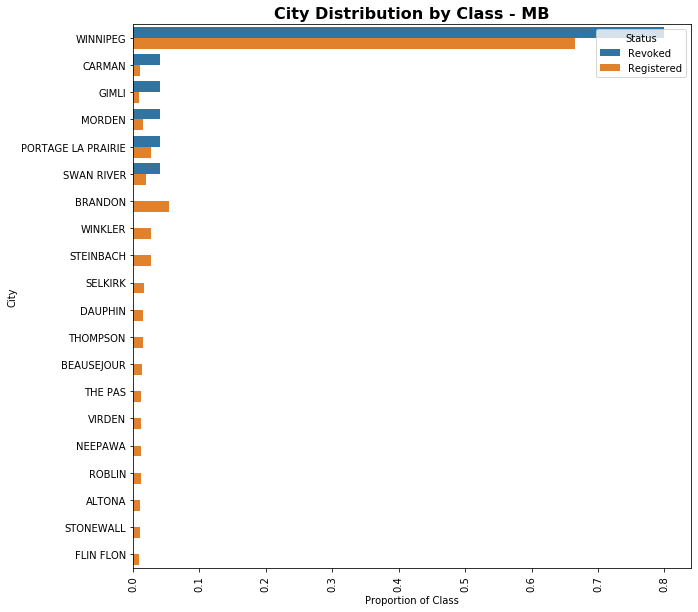

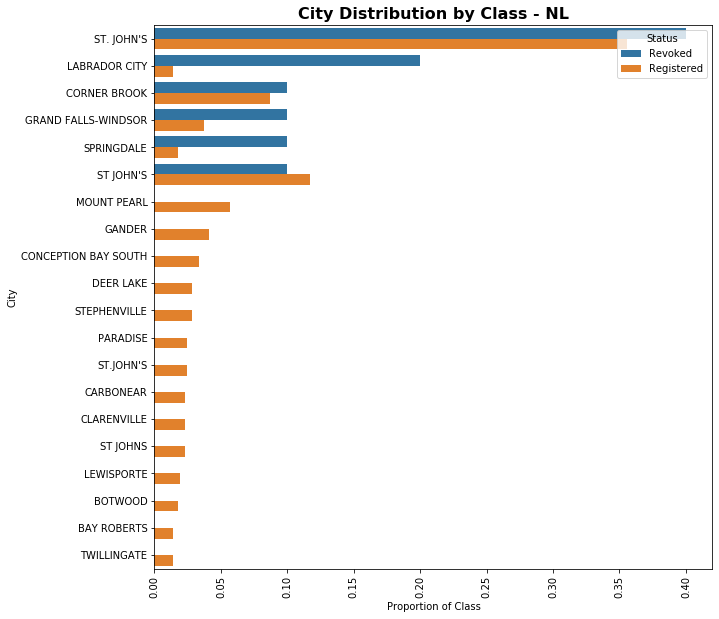

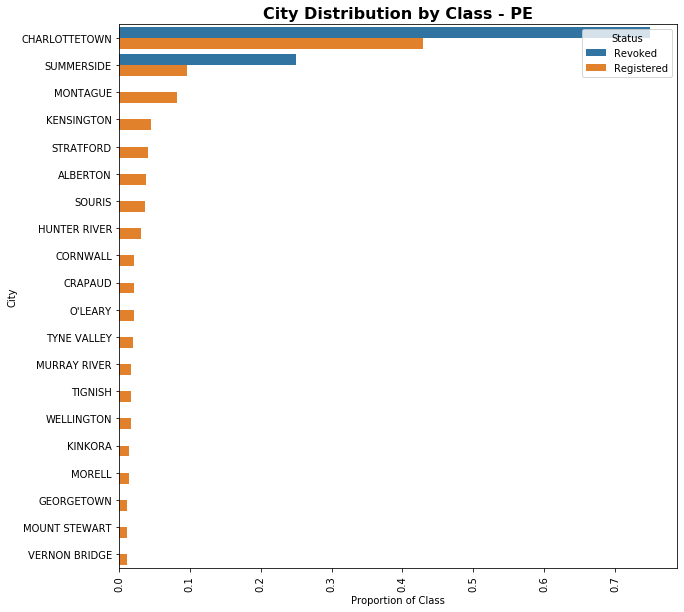

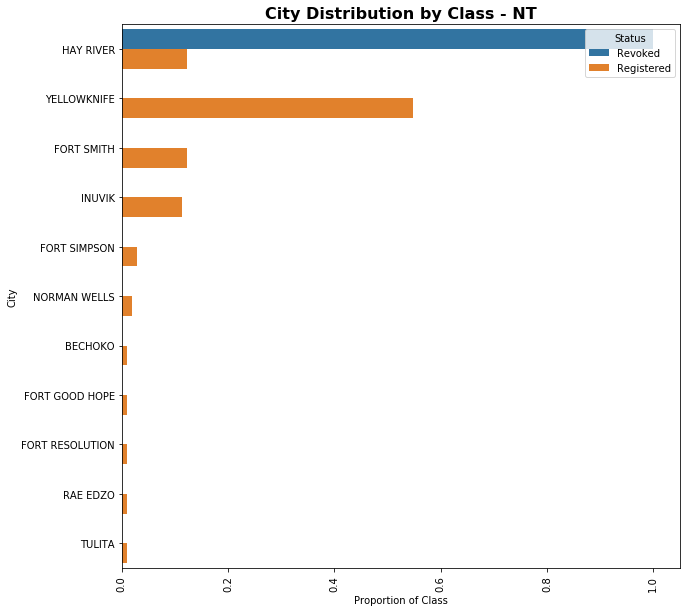

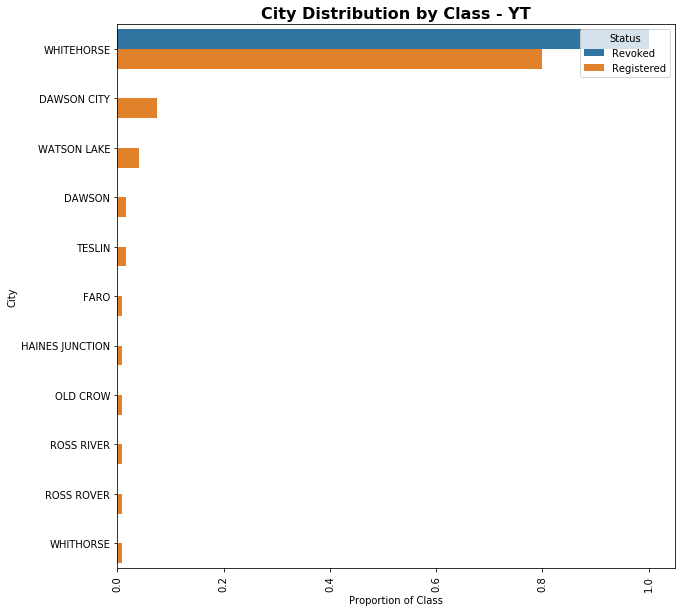

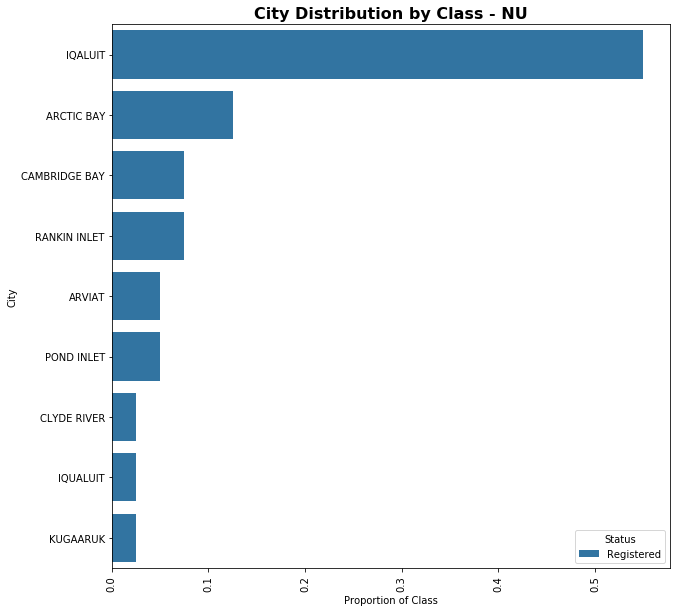

In [7]:
for province in canada_provinces:
    cat_df = df.loc[df['Province'] == province, :] #filter for province data
    top_cities = cat_df['City'].value_counts(dropna=False)[:20].index.tolist()
    cat_df = cat_df.loc[cat_df['City'].isin(top_cities), :]
    
    plt.figure(figsize=[10,10])
    cat_df = cat_df.groupby(['Status','City'])['BN/Registration Number'].agg(['count'])
    cat_df['subcategory_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
    cat_df = cat_df['subcategory_perc'].reset_index().sort_values(['Status', 'subcategory_perc'], ascending=False)

    sns.barplot(x='subcategory_perc', y='City', hue='Status', data=cat_df)
    plt.xticks(rotation=90)
    plt.ylabel('City')
    plt.xlabel('Proportion of Class')
    plt.title('City Distribution by Class - {}'.format(province), fontsize = 16, fontweight='bold')
    plt.show();

#### Program Areas

C:\Users\cassa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


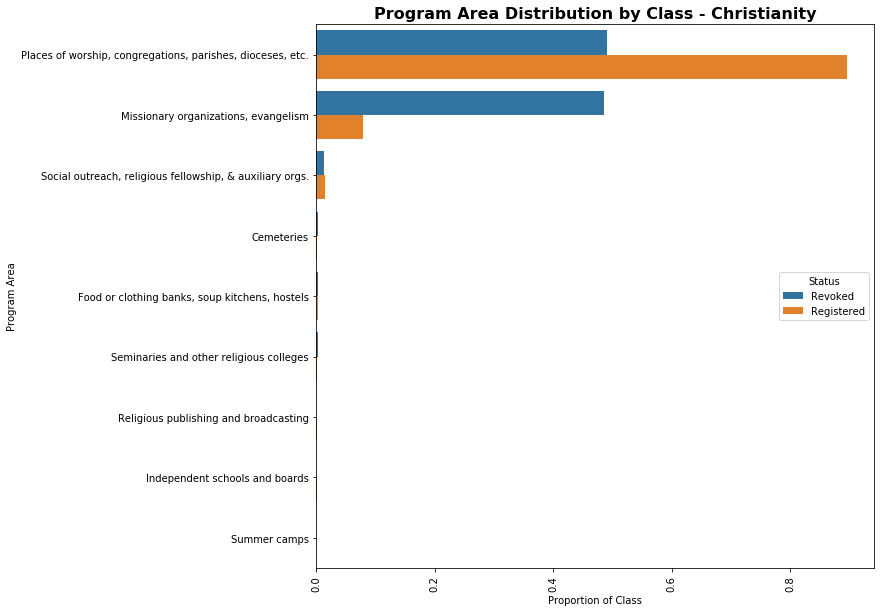

C:\Users\cassa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


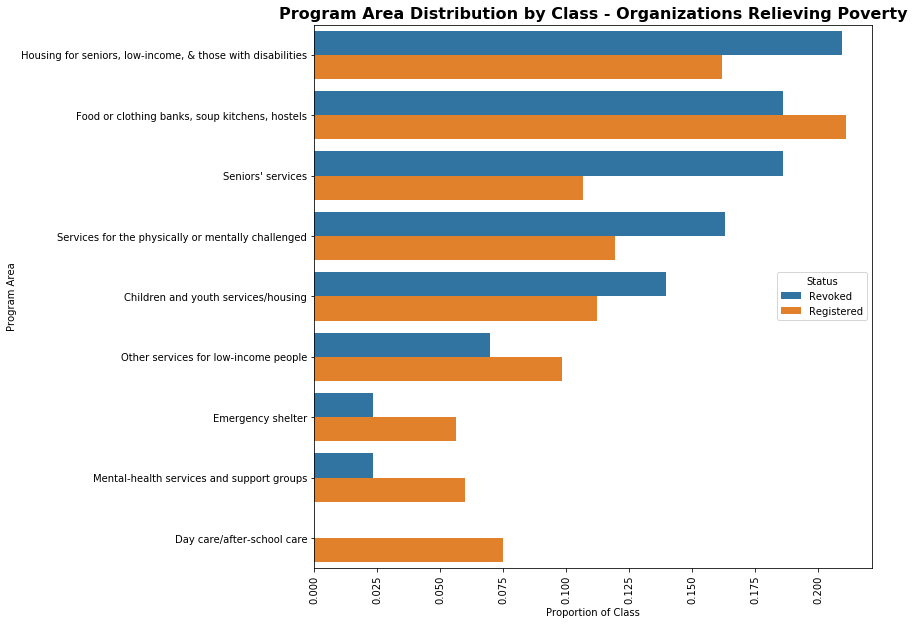

C:\Users\cassa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


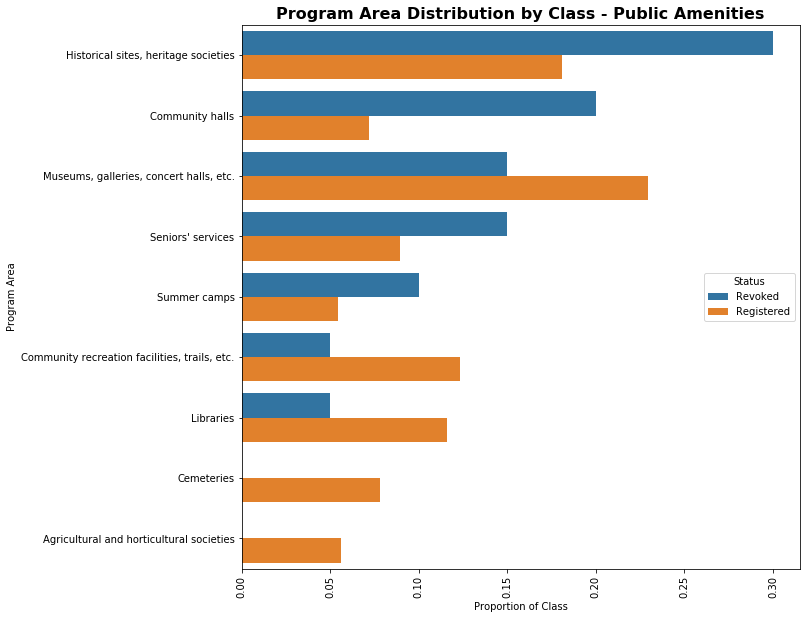

C:\Users\cassa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


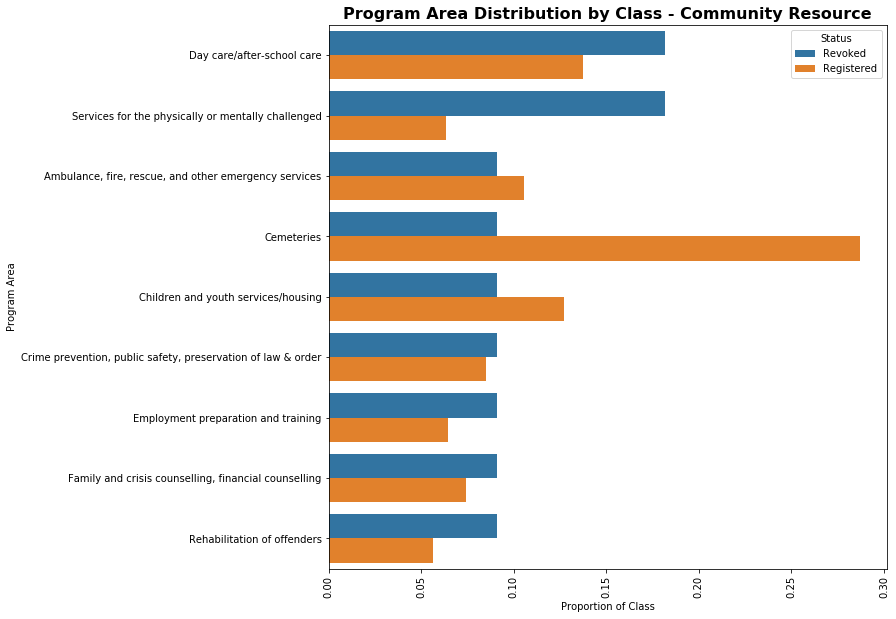

C:\Users\cassa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


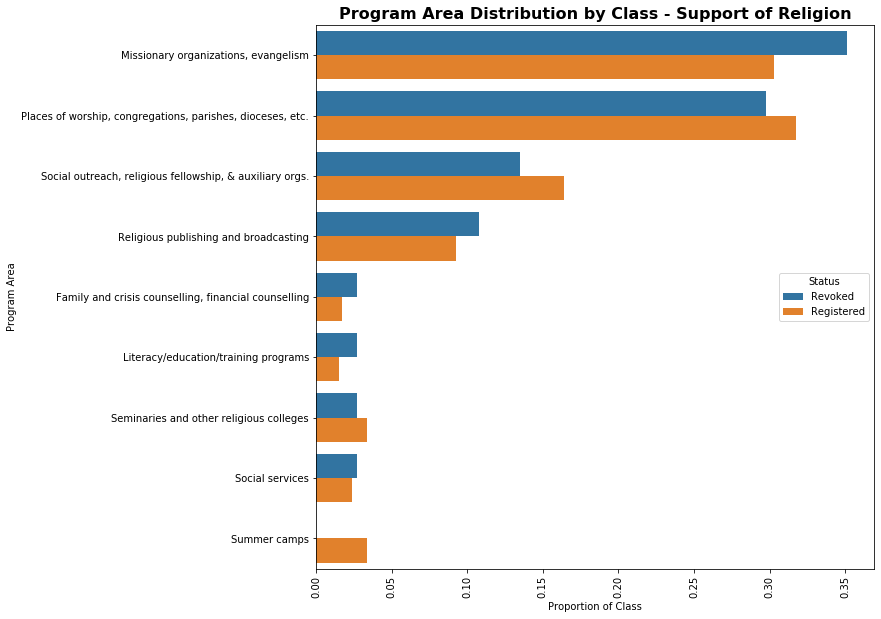

C:\Users\cassa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


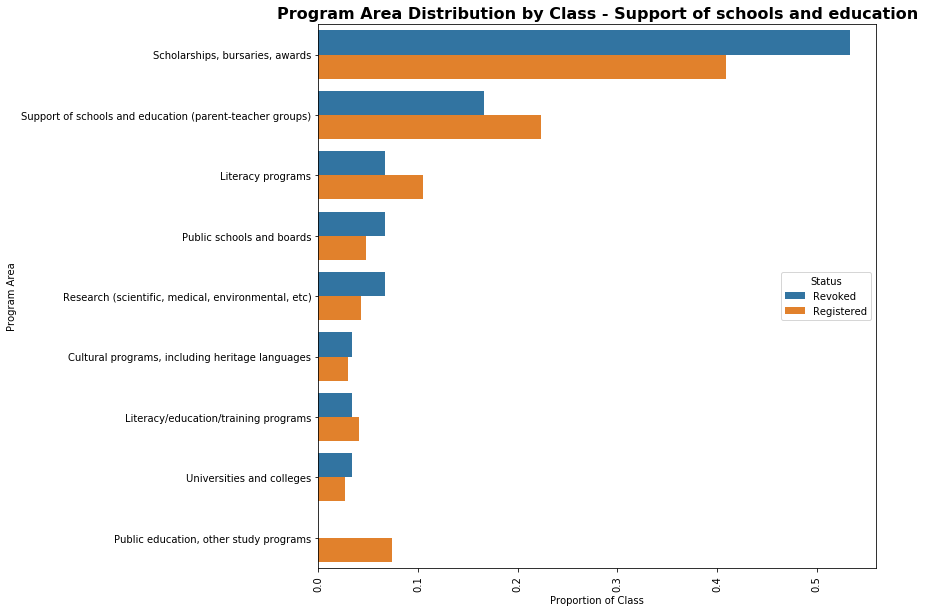

C:\Users\cassa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


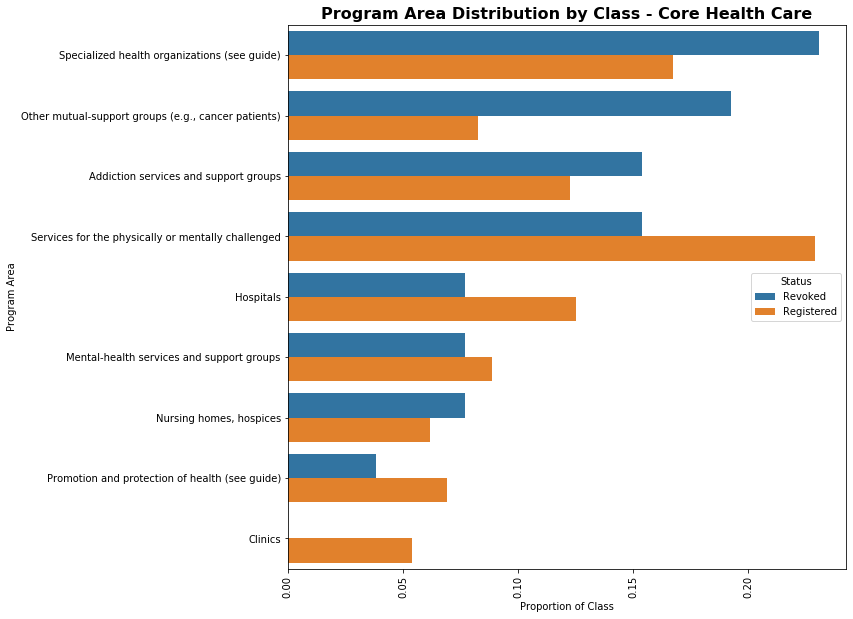

C:\Users\cassa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


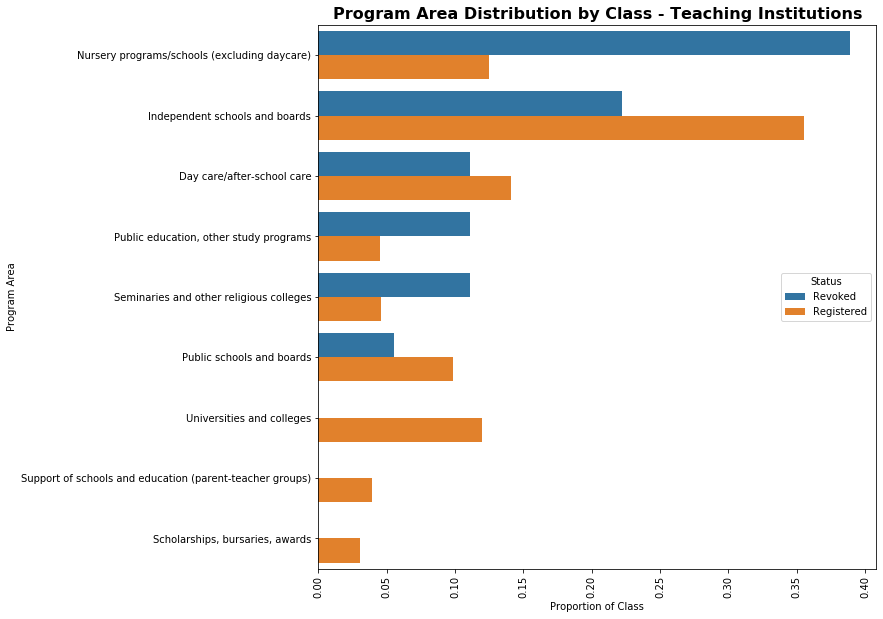

C:\Users\cassa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


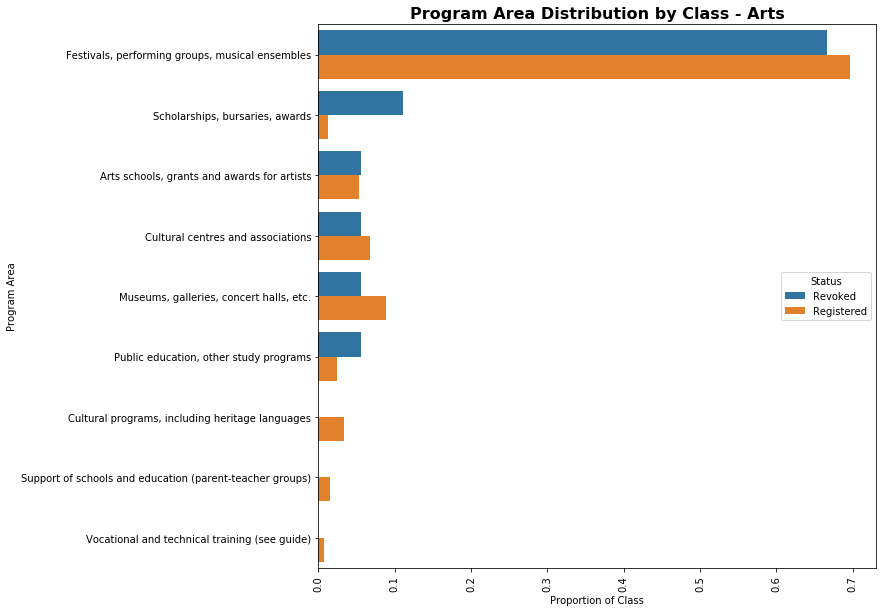

C:\Users\cassa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


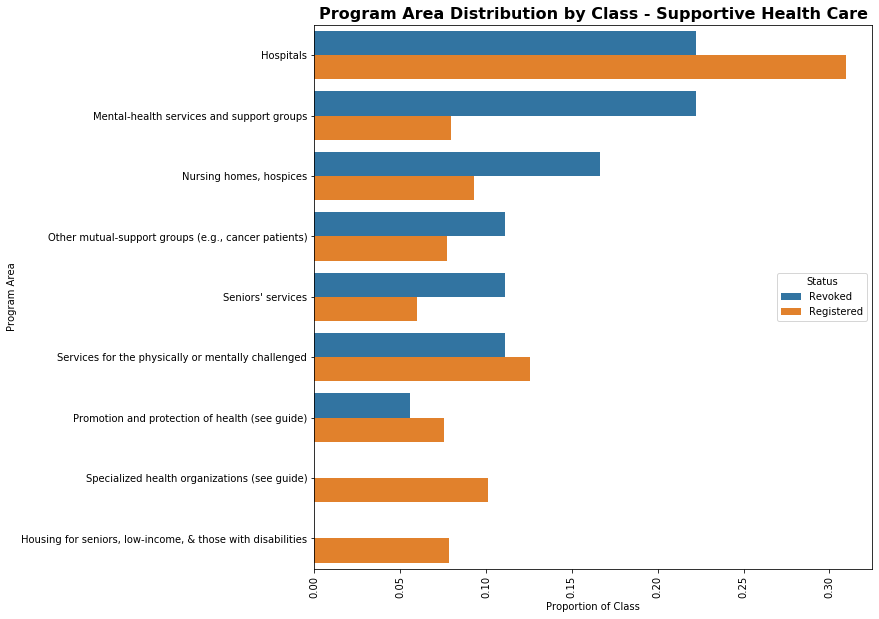

In [8]:
top_categories = df['Category'].value_counts(dropna=False)[:10].index.tolist()

for category in top_categories:
    cat_df = df.loc[df['Category']==category, :] #filter for category data
    cat_df = cat_df[df['1200 Program Area']!='(Free-form text)'] #removing free-form text responses for easy comparison
    top_program_areas = cat_df['1200 Program Area'].value_counts(dropna=False)[:10].index.tolist()
    cat_df = cat_df.loc[cat_df['1200 Program Area'].isin(top_program_areas), :]
    
    plt.figure(figsize=[10,10])
    cat_df = cat_df.groupby(['Status','1200 Program Area'])['BN/Registration Number'].agg(['count'])
    cat_df['subcategory_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
    cat_df = cat_df['subcategory_perc'].reset_index().sort_values(['Status', 'subcategory_perc'], ascending=False)

    sns.barplot(x='subcategory_perc', y='1200 Program Area', hue='Status', data=cat_df)
    plt.xticks(rotation=90)
    plt.ylabel('Program Area')
    plt.xlabel('Proportion of Class')
    plt.title('Program Area Distribution by Class - {}'.format(category), fontsize = 16, fontweight='bold')
    plt.show();

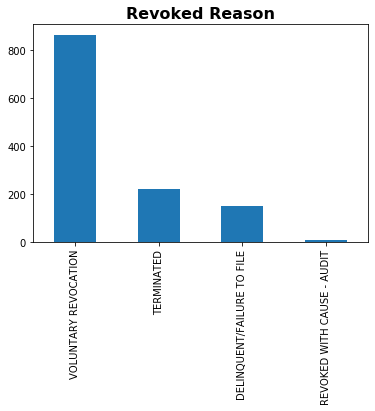

In [9]:
df.loc[df['Revoked Reason'].notnull(), 'Revoked Reason'].value_counts(dropna=False).plot(kind='bar')
plt.title('Revoked Reason', fontsize = 16, fontweight='bold')
plt.show()

## Financial Info

Total assets (4200), Total liabilities (4350)

Total revenue (4700), Total expenditures (5100)

Total accumulated (5500) / Total disbursed (5510)

Total expenditures by type (4950, 5000, 5010, 5020, 5030, 5040, 5050, 5100)

Total revenue by type (4510, 4530, 4540, 4550, 4560, 4570, 4571, 4575, 4580, 4590, 4600, 4610, 4620, 4630, 4640, 4650)

In [10]:
'''
def removeOutliers(data, thresholdStd = 3):
    """
    This method returns all value indices which are farther away
    than thresholdStd standard deviationa
    """
    not_outliers = []
    mean = np.mean(data)
    std = np.std(data)
    if std == 0:
        return data
    
    for i, y in enumerate(data):
        z_score = (y - mean) / std
        if np.abs(z_score) <= thresholdStd:
            not_outliers.append(i)
    return not_outliers
'''

In [11]:
'''
df['all'] = ''

for col in df.select_dtypes(include='number').columns:
    title = data_dic.loc[data_dic['column_name']==col, 'description'].values[0]
    
    #remove outliers beyond 3 std devs
    not_outliers = removeOutliers(df[col])
    
    ax = sns.violinplot(x='all',y=col, hue='Status', data=df.iloc[not_outliers,:], split=True)
    ax.set_xlabel('')
    ax.set_ylabel(col.replace("_", " "))
    ax.set_title(col + ': ' + title, size=15)
    plt.show()
'''

NameError: name 'data_dic' is not defined

Q: Why do some columns show negative values? Is this a data entry error?

See columns:

- 4100
- 4530
- 4650
- 4820

In [ ]:
'''
#bivariate plotting

#regression between two variables
sns.set(font='DejaVu Sans')
sns.jointplot([x col], [y col], df, kind='reg').fig.suptitle('y col Regression', y=1.01)

sns.lmplot([x col], [y col], df, col='Status').fig.suptitle('y col Regression - categorized by Status', y=1.05)
'''